# 日本古典籍字形データセットを利用したDeep Learning実験（2016/11/18）

加賀藩研究ネットワークでの報告(2016/11/19)のため『日本古典籍字形データセット』（国文研所蔵・CODH加工）
（提供：[人文学オープンデータ共同利用センター](http://codh.rois.ac.jp/)）を利用したDeep Learning実験を行う．

## 教師用データの作成

『日本古典籍字形データセット』の『[料理物語](http://codh.rois.ac.jp/char-shape/book/200021802/)』のデータの一部を使って教師用データを作成する．

In [ ]:
import os
import cv2 as cv
import six.moves.cPickle as pickle
import numpy as np

dic={'U+8272':1,'U+3069':2,'U+306B':3,'U+307C':4,'U+9152':5,'U+540C':6,'U+5347':7,'U+304C':8,'U+3067':9,'U+3070':10}

data = []
target = []
IMG_PATH = "./200021802/characters/"
dn=0
tmp = os.listdir(IMG_PATH)
for d in tmp:
   if not d.startswith("U+"):
     continue
   if(not dic.has_key(d)):
     continue
   tmp2 = os.listdir(IMG_PATH+d)
   for f in tmp2:
     image = cv.imread(IMG_PATH+d+"/"+f)
     #image = cv.cvtColor(image, cv.COLOR_RGB2GRAY)
     image = cv.resize(image, (32, 32))
     image = image/255.0
     data.append(image)
     target.append(dic[d])

data = np.array(data, np.float32)
target = np.array(target, np.int32)
pickle.dump((data,target), open("dataset.pkl", 'wb'), -1)

## モデルの作成

In [ ]:
%matplotlib inline
from __future__ import division, print_function

In [41]:
from keras import backend as K
from keras.datasets import mnist
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Convolution2D,MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.models import Sequential
from keras.utils.np_utils import to_categorical
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import os
import six.moves.cPickle as pickle

In [6]:
np.random.seed(0)

In [7]:
dataset,target = pickle.load(open("dataset200021802mini.pkl","rb"))

In [8]:
dataset.shape

(1474, 32, 32, 3)

In [9]:
target.shape

(1474,)

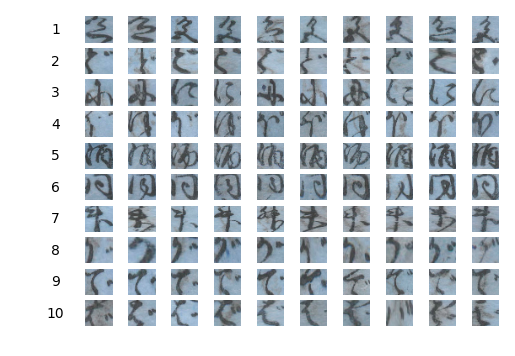

In [10]:
import matplotlib.pyplot as plt

label_images = {label: [] for label in set(target.tolist())}
for x, label in zip(dataset, target):
    label_images[label].append(x)

for j, (label, images) in enumerate(label_images.items()):
    plt.subplot(10, 11, j * 11 + 1)
    plt.text(0.5, 0.5, label, ha='center', va='center')
    plt.axis('off')
    for i, image in enumerate(images):
        if i >= 10:
            continue
        plt.subplot(10, 11, j * 11 +  i + 2)
        plt.imshow(image, cmap='Greys_r')
        plt.axis('off')
plt.show()
    
del label_images

In [12]:
x_dataset = dataset

In [36]:
x_dataset.shape


(1474, 32, 32, 3)

In [37]:
x_dataset[1].shape

(32, 32, 3)

In [14]:
y_target = to_categorical(target)

In [15]:
y_target

array([[ 0.,  0.,  0., ...,  1.,  0.,  0.],
       [ 0.,  0.,  0., ...,  1.,  0.,  0.],
       [ 0.,  0.,  0., ...,  1.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [71]:
model = Sequential()
model.add(Convolution2D(96, 3, 3, border_mode='same', input_shape=dataset[1].shape))
model.add(Activation('relu'))
model.add(Convolution2D(32, 2, 2))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Convolution2D(64, 3, 3, border_mode='same'))
model.add(Activation('relu'))
model.add(Convolution2D(64, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(11))
model.add(Activation('softmax'))
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [66]:
model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
convolution2d_48 (Convolution2D) (None, 32, 32, 96)    2688        convolution2d_input_25[0][0]     
____________________________________________________________________________________________________
activation_53 (Activation)       (None, 32, 32, 96)    0           convolution2d_48[0][0]           
____________________________________________________________________________________________________
convolution2d_49 (Convolution2D) (None, 31, 31, 32)    12320       activation_53[0][0]              
____________________________________________________________________________________________________
activation_54 (Activation)       (None, 31, 31, 32)    0           convolution2d_49[0][0]           
___________________________________________________________________________________________

## 学習

In [123]:
model.fit(x_dataset, y_target, batch_size=128, nb_epoch=200, verbose=1)

Epoch 1/200
1474/1474 [==============================] - 12s - loss: 0.1983 - acc: 0.9369    
Epoch 2/200
1474/1474 [==============================] - 13s - loss: 0.1623 - acc: 0.9444    
Epoch 3/200
1474/1474 [==============================] - 13s - loss: 0.1665 - acc: 0.9437    
Epoch 4/200
1474/1474 [==============================] - 14s - loss: 0.1616 - acc: 0.9471    
Epoch 5/200
1474/1474 [==============================] - 15s - loss: 0.1749 - acc: 0.9389    
Epoch 6/200
1474/1474 [==============================] - 11s - loss: 0.1391 - acc: 0.9505    
Epoch 7/200
1474/1474 [==============================] - 11s - loss: 0.1424 - acc: 0.9518    
Epoch 8/200
1474/1474 [==============================] - 11s - loss: 0.1337 - acc: 0.9505    
Epoch 9/200
1474/1474 [==============================] - 11s - loss: 0.1275 - acc: 0.9545    
Epoch 10/200
1474/1474 [==============================] - 12s - loss: 0.1178 - acc: 0.9593    
Epoch 11/200
1474/1474 [==============================] - 1

モデルを保存する

In [ ]:
model.save("model20161118a.h5")

モデルを読み込む

In [3]:
from keras.models import load_model
model = load_model('./model20161118a.h5')

Using TensorFlow backend.


## くずし字識別実験

In [6]:
%matplotlib inline
from __future__ import division, print_function
import numpy as np
from keras.models import load_model
import matplotlib.pyplot as plt
import cv2 as cv
np.set_printoptions(suppress=True) #小数点表示とする
np.set_printoptions(precision=3) #小数点第三位までとする
dic={1:u'\u8272',2:u'\u3069',3:u'\u306B',4:u'\u307C',5:u'\u9152',6:u'\u540C',7:u'\u5347',8:u'\u304C',9:u'\u3067',10:u'\u3070'}

### ケース１ OK

1/1 [==============================] - 0s
が


u'\u304c'

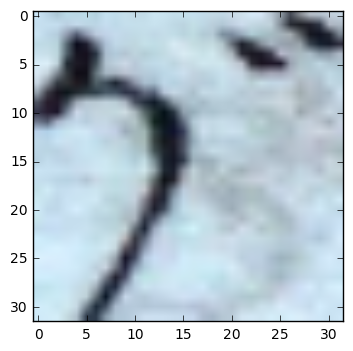

In [7]:
image = cv.imread("u304c_00.jpg")
image = cv.resize(image, (32, 32))
plt.imshow(image, cmap='Greys_r')
image
image = image/255.0
x=np.array(image,np.float32)
x=x.reshape((1,)+x.shape)
labels_pred = model.predict_classes(x,verbose=1)
print(dic[labels_pred[0]])
dic[labels_pred[0]]

In [8]:
model.predict(x)

array([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.]], dtype=float32)

###  ケース2  NG

1/1 [==============================] - 0s
に


u'\u306b'

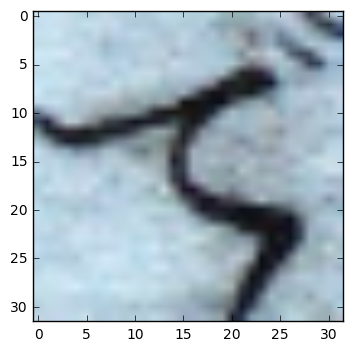

In [10]:
image = cv.imread("u3067_00.jpg")
image = cv.resize(image, (32, 32))
plt.imshow(image, cmap='Greys_r')
image
image = image/255.0
x=np.array(image,np.float32)
x=x.reshape((1,)+x.shape)
labels_pred = model.predict_classes(x,verbose=1)
print(dic[labels_pred[0]])
dic[labels_pred[0]]

In [11]:
model.predict(x)

array([[ 0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]], dtype=float32)

### ケース3 NG

1/1 [==============================] - 0s
で


u'\u3067'

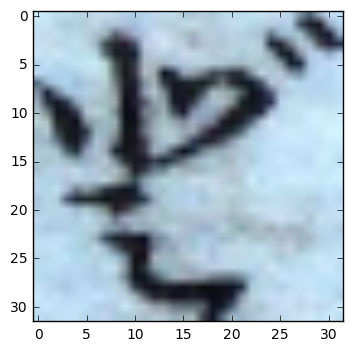

In [12]:
image = cv.imread("u3069_00.jpg")
image = cv.resize(image, (32, 32))
plt.imshow(image, cmap='Greys_r')
image
image = image/255.0
x=np.array(image,np.float32)
x=x.reshape((1,)+x.shape)
labels_pred = model.predict_classes(x,verbose=1)
print(dic[labels_pred[0]])
dic[labels_pred[0]]

In [13]:
model.predict(x)

array([[ 0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,
         0.   ,  0.539,  0.461]], dtype=float32)

### ケース4 OK

1/1 [==============================] - 0s
に


u'\u306b'

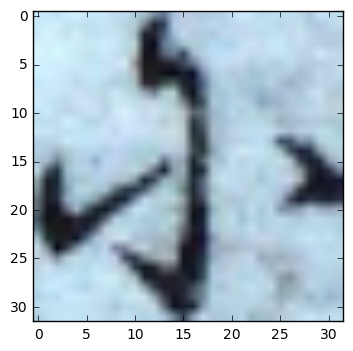

In [14]:
image = cv.imread("u306b_00.jpg")
image = cv.resize(image, (32, 32))
plt.imshow(image, cmap='Greys_r')
image
image = image/255.0
x=np.array(image,np.float32)
x=x.reshape((1,)+x.shape)
labels_pred = model.predict_classes(x,verbose=1)
print(dic[labels_pred[0]])
dic[labels_pred[0]]

In [15]:
model.predict(x)

array([[ 0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]], dtype=float32)

### ケース5 OK

1/1 [==============================] - 0s
ば


u'\u3070'

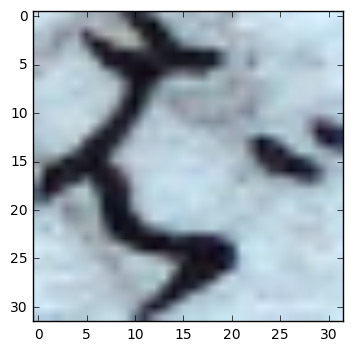

In [16]:
image = cv.imread("u3070_00.jpg")
image = cv.resize(image, (32, 32))
plt.imshow(image, cmap='Greys_r')
image
image = image/255.0
x=np.array(image,np.float32)
x=x.reshape((1,)+x.shape)
labels_pred = model.predict_classes(x,verbose=1)
print(dic[labels_pred[0]])
dic[labels_pred[0]]

In [17]:
model.predict(x)

array([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]], dtype=float32)

### ケース6 NG

1/1 [==============================] - 0s
が


u'\u304c'

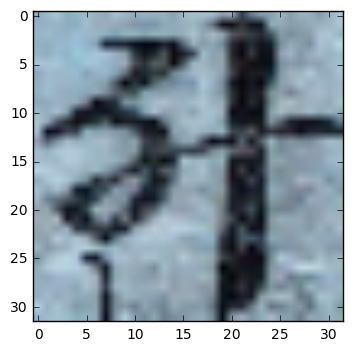

In [18]:
image = cv.imread("u5347_00.jpg")
image = cv.resize(image, (32, 32))
plt.imshow(image, cmap='Greys_r')
image
image = image/255.0
x=np.array(image,np.float32)
x=x.reshape((1,)+x.shape)
labels_pred = model.predict_classes(x,verbose=1)
print(dic[labels_pred[0]])
dic[labels_pred[0]]

In [19]:
model.predict(x)

array([[ 0.   ,  0.   ,  0.   ,  0.016,  0.   ,  0.   ,  0.   ,  0.   ,
         0.984,  0.   ,  0.   ]], dtype=float32)

### ケース7 OK

1/1 [==============================] - 0s
同


u'\u540c'

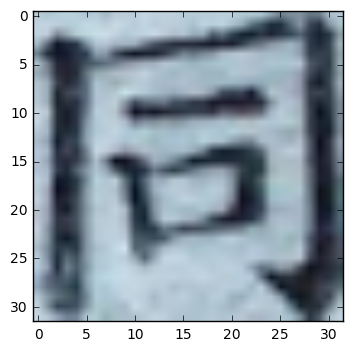

In [20]:
image = cv.imread("u540c_00.jpg")
image = cv.resize(image, (32, 32))
plt.imshow(image, cmap='Greys_r')
image
image = image/255.0
x=np.array(image,np.float32)
x=x.reshape((1,)+x.shape)
labels_pred = model.predict_classes(x,verbose=1)
print(dic[labels_pred[0]])
dic[labels_pred[0]]

In [21]:
model.predict(x)

array([[ 0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.481,  0.519,  0.   ,
         0.   ,  0.   ,  0.   ]], dtype=float32)

### ケース8　OK

1/1 [==============================] - 0s
色


u'\u8272'

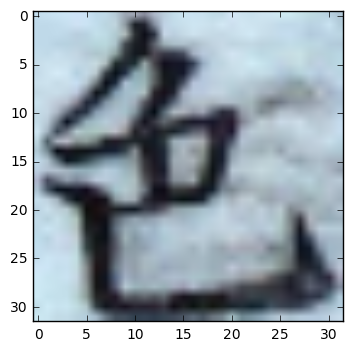

In [22]:
image = cv.imread("u8272_00.jpg")
image = cv.resize(image, (32, 32))
plt.imshow(image, cmap='Greys_r')
image
image = image/255.0
x=np.array(image,np.float32)
x=x.reshape((1,)+x.shape)
labels_pred = model.predict_classes(x,verbose=1)
print(dic[labels_pred[0]])
dic[labels_pred[0]]

In [23]:
model.predict(x)

array([[ 0.   ,  0.922,  0.   ,  0.065,  0.   ,  0.   ,  0.002,  0.011,
         0.   ,  0.   ,  0.   ]], dtype=float32)

### ケース9 NG

1/1 [==============================] - 0s
に


u'\u306b'

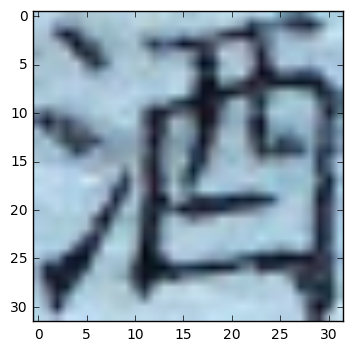

In [24]:
image = cv.imread("u9152_00.jpg")
image = cv.resize(image, (32, 32))
plt.imshow(image, cmap='Greys_r')
image
image = image/255.0
x=np.array(image,np.float32)
x=x.reshape((1,)+x.shape)
labels_pred = model.predict_classes(x,verbose=1)
print(dic[labels_pred[0]])
dic[labels_pred[0]]

In [25]:
model.predict(x,verbose=1)

1/1 [==============================] - 0s


array([[ 0.   ,  0.311,  0.   ,  0.689,  0.   ,  0.   ,  0.   ,  0.   ,
         0.   ,  0.   ,  0.   ]], dtype=float32)

### ケース10 OK

1/1 [==============================] - 0s
ぼ


u'\u307c'

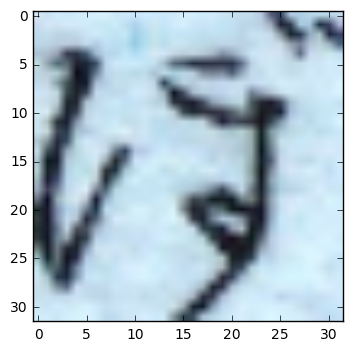

In [26]:
image = cv.imread("u307c_00.jpg")
image = cv.resize(image, (32, 32))
plt.imshow(image, cmap='Greys_r')
image
image = image/255.0
x=np.array(image,np.float32)
x=x.reshape((1,)+x.shape)
labels_pred = model.predict_classes(x,verbose=1)
print(dic[labels_pred[0]])
dic[labels_pred[0]]

In [27]:
model.predict(x,verbose=1)

1/1 [==============================] - 0s


array([[ 0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.]], dtype=float32)

### モデルの可視化

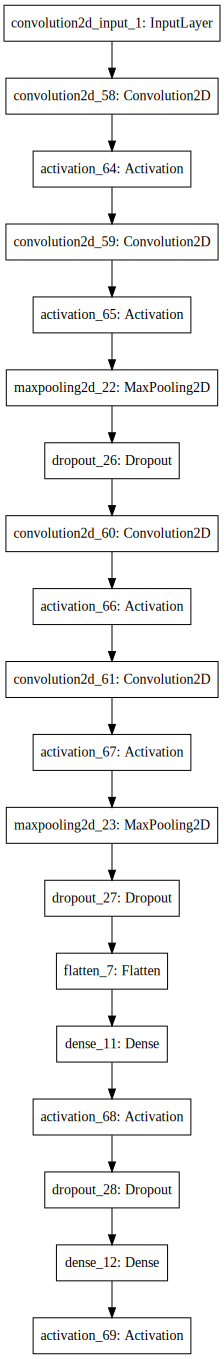

In [29]:
from IPython.display import SVG
from keras.utils.visualize_util import model_to_dot

SVG(model_to_dot(model).create(prog='dot', format='svg'))